## **Trying out Uber's Ludwig on Titanic quickly (~73% accuracy with minimal work)**

Preloaded in colab
- train.csv (Titanic training data)
- test.csv (Titanic test data)
- model_config.yml (YAML model config for Ludwig)

In [2]:
# No idea which ones I'll use so I'll install them all
!pip install -q ludwig
!pip install -q ludwig[text]
!pip install -q ludwig[hyperopt]
!pip install -q ludwig[viz]
!pip install -q ludwig[test]

ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [3]:
# Ok these ones seem appropriate
from ludwig.api import LudwigModel
from ludwig.visualize import learning_curves
import pandas as pd
import logging
import shutil

In [4]:
# Apparently clearing this is important
shutil.rmtree('/results', ignore_errors=True)
shutil.rmtree('/visualizations', ignore_errors=True)

In [5]:
# Train and test data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [6]:
# Create model using the YAML file (seems like the key)
model = LudwigModel(config="/content/model_config.yml",
                    logging_level=logging.WARN)

# Train the model
train_stats, _, _ = model.train(dataset = train,
                                experiment_name = 'here_goes_nothing',
                                model_name = "1")

In [7]:
# Make predictions on test set (tuple returned)
preds, _ = model.predict(test)

# Create a series out of the predictions
preds_series = pd.Series(preds["Survived_predictions"])

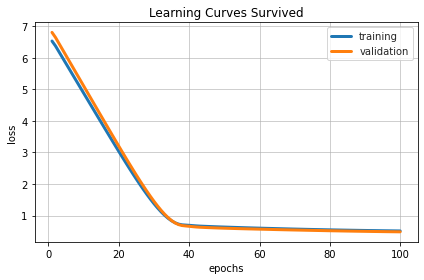

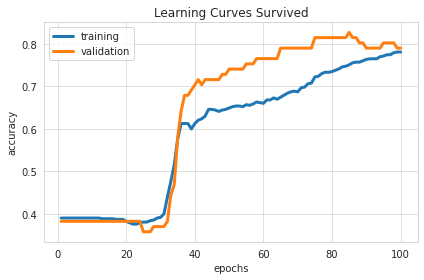

In [8]:
# Look at the learning curves on train/valid
learning_curves(train_stats, 'Survived',
                file_format='png')

In [9]:
# Get just the test data ids
ids = test["PassengerId"]

In [10]:
# Not sure why it doesn't return neatly, transpose it
submission_test = pd.DataFrame([ids, preds_series]) \
                                                .transpose() \
                                                .rename(columns = {"Survived_predictions":"Survived"})

In [12]:
submission_test

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [11]:
submission_test.to_csv("submission.csv")